In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
df = pd.read_csv("train.csv")

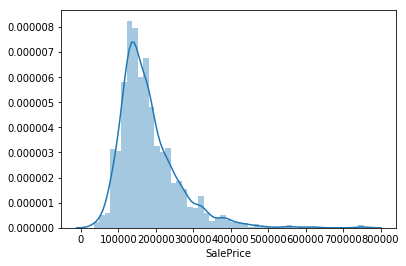

In [3]:
sns.distplot(df['SalePrice'])

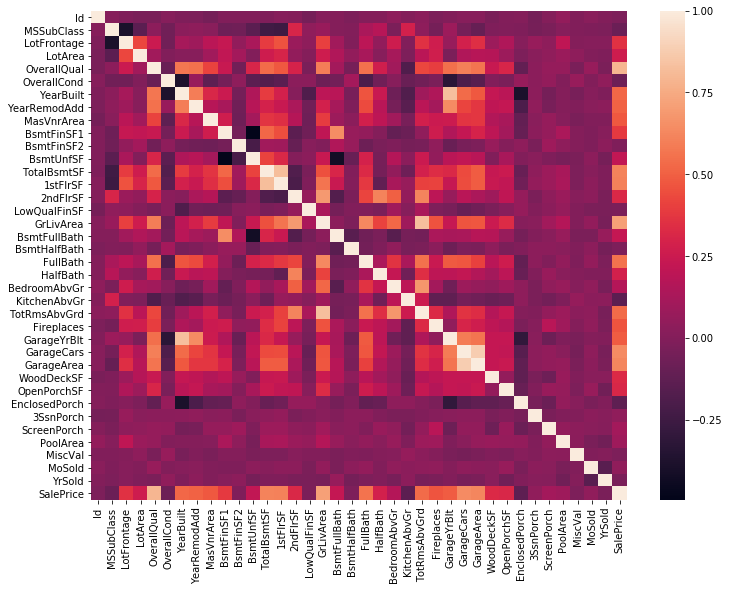

In [4]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr())

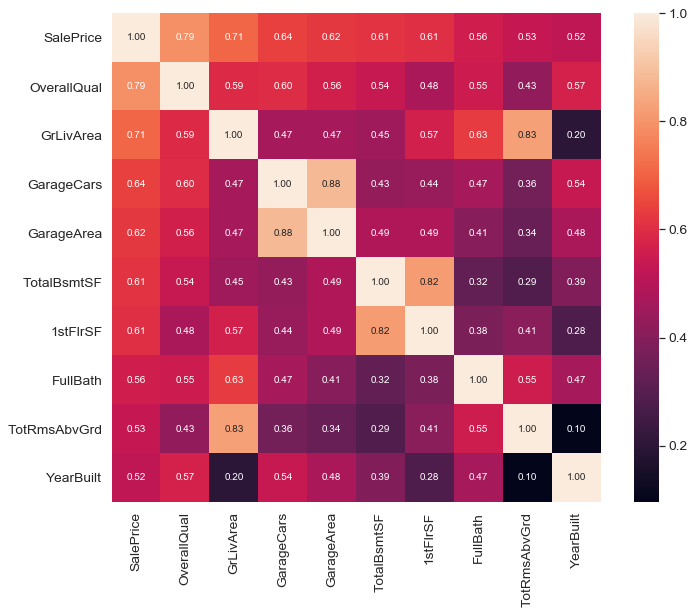

In [5]:
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
df['LotFrontage'].isnull().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

In [7]:
df[df["1stFlrSF"] > 700]['LotFrontage'].mean()

71.85637342908439

In [8]:
df[df["1stFlrSF"] < 700]['LotFrontage'].mean()

46.91954022988506

In [9]:
df.loc[df["1stFlrSF"] < 700, 'LotFrontage'] = 46.9


In [10]:
df.loc[df["1stFlrSF"] > 700, 'LotFrontage'] = 71.8

In [11]:
df["total_sq"] = df["2ndFlrSF"] + df["1stFlrSF"]
df["number_of_bath"] = df["FullBath"] + df["BsmtFullBath"]
df["total_half_bath"] = df["HalfBath"] + df["BsmtHalfBath"]

In [12]:
df = df.drop(['Alley', 'YearRemodAdd', '1stFlrSF', 'BsmtUnfSF', 'Id', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath', '2ndFlrSF', 'Exterior2nd', 'RoofStyle', 'MasVnrArea', 'HouseStyle', 'Condition2', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'Alley', 'BsmtFinType2', 'Electrical', 'BsmtQual', 'PoolQC', 'KitchenQual', 'BsmtExposure', 'GarageYrBlt', 'GarageArea', 'GarageFinish', 'BsmtCond', 'GarageType', 'GarageCond', 'GarageQual', 'Exterior1st', 'BsmtFinType1', 'BsmtFinType2',  'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [13]:
df.isnull().any()

MSSubClass         False
MSZoning           False
LotFrontage        False
LotArea            False
LotShape           False
LotConfig          False
Neighborhood       False
Condition1         False
BldgType           False
OverallQual        False
OverallCond        False
YearBuilt          False
RoofMatl           False
ExterQual          False
ExterCond          False
Foundation         False
TotalBsmtSF        False
Heating            False
HeatingQC          False
CentralAir         False
LowQualFinSF       False
GrLivArea          False
BedroomAbvGr       False
KitchenAbvGr       False
TotRmsAbvGrd       False
Functional         False
Fireplaces         False
GarageCars         False
PavedDrive         False
WoodDeckSF         False
OpenPorchSF        False
EnclosedPorch      False
3SsnPorch          False
ScreenPorch        False
PoolArea           False
MiscVal            False
MoSold             False
YrSold             False
SaleType           False
SaleCondition      False


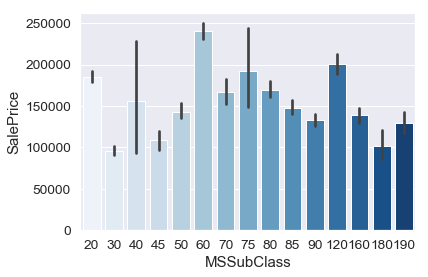

In [14]:
sns.barplot(x=df["MSSubClass"], y=df["SalePrice"], palette="Blues")


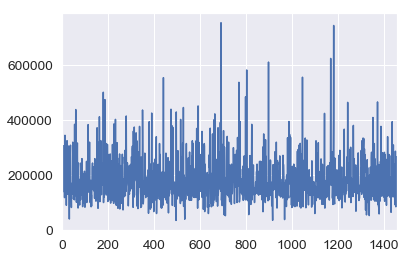

In [15]:
df["SalePrice"].plot()

In [16]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'total_sq', 'number_of_bath',
       'total_half_bath'],
      dtype='object')

In [17]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i]= df[i].astype('category')
        df[i] = df[i].cat.codes

In [18]:
X = df.drop(['SalePrice'], axis=1)

In [19]:
y = df["SalePrice"]

In [20]:
X.shape

(1460, 43)

In [21]:
y.shape

(1460,)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
k = RandomForestRegressor(max_depth = 10)
k.fit(X, y)

/Users/diana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
k.score(X, y)

0.9720461652428373

In [25]:
df_test = pd.read_csv("test.csv")

In [26]:
df_test.loc[df_test["1stFlrSF"] < 700, 'LotFrontage'] = 46.9


In [27]:
df_test.loc[df_test["1stFlrSF"] > 700, 'LotFrontage'] = 71.8

In [28]:
df_test["total_sq"] = df_test["2ndFlrSF"] + df_test["1stFlrSF"]
df_test["number_of_bath"] = df_test["FullBath"] + df_test["BsmtFullBath"]
df_test["total_half_bath"] = df_test["HalfBath"] + df_test["BsmtHalfBath"]

In [29]:
df_test = df_test.drop(['Alley', 'YearRemodAdd', '1stFlrSF', 'BsmtUnfSF', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath', '2ndFlrSF', 'Exterior2nd', 'RoofStyle', 'MasVnrArea', 'HouseStyle', 'Condition2', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'Alley', 'BsmtFinType2', 'Electrical', 'BsmtQual', 'PoolQC', 'KitchenQual', 'BsmtExposure', 'GarageYrBlt', 'GarageArea', 'GarageFinish', 'BsmtCond', 'GarageType', 'GarageCond', 'GarageQual', 'Exterior1st', 'BsmtFinType1', 'BsmtFinType2',  'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [30]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['total_half_bath'] = df_test['total_half_bath'].fillna(df_test['total_half_bath'].mean())
df_test['number_of_bath'] = df_test['number_of_bath'].fillna(df_test['number_of_bath'].mean())
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])



In [31]:
for i in df_test.columns:
    if(df_test[i].dtype == 'object'):
        df_test[i]= df_test[i].astype('category')
        df_test[i] = df_test[i].cat.codes

In [32]:
df_test["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [33]:
ids = df_test["Id"]
df_test = df_test.drop(["Id"], axis = 1)

In [34]:
ypred = k.predict(df_test)

In [35]:
df_to_submit = pd.DataFrame({"Id" : ids, "SalePrice" : ypred}).set_index(["Id"])

In [36]:
df_to_submit

,SalePrice
Id,
1461,133118.206833
1462,149060.000000
1463,177201.772444
1464,183332.772444
1465,198590.000000
1466,176563.572650
1467,175500.000000
1468,175007.239316
1469,175057.355195


In [38]:
file_to_submit = df_to_submit.to_csv("submission_9.csv")